<a href="https://colab.research.google.com/github/Aarya718/Codsoft-projects/blob/main/MovieRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-2 : MOVIE RATING PREDICTION USING PYTHON**

Name: Aarya Ramchandra Tarphe

Batch: February

Domain: Data Science

Aim: Build a model that predicts the rating of a movie based on features like genre, director, and actors.

# IMPORTING PYTHON LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# UPLOADING DATASET

In [ ]:
movie_data = pd.read_csv('/content/IMDb Movies India.csv', encoding="latin1")
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING AND ANALYSIS

In [ ]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
movie_data.dropna(subset=["Rating"], inplace = True)

In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
movie_data .dropna(subset=["Rating"], inplace = True)


In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)

In [ ]:
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)

In [ ]:
movie_data['Duration'] = movie_data['Duration'].str.strip('min')

In [ ]:
movie_data['Duration'].fillna(movie_data['Duration'].median(), inplace=True)


<ipython-input-25-800bd0500bdd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data['Duration'].fillna(movie_data['Duration'].median(), inplace=True)


In [ ]:
movie_data['Duration'].dtype


dtype('O')

In [ ]:
movie_data['Duration'] = movie_data['Duration'].astype(str).str.strip()  # Remove spaces
movie_data['Duration'] = pd.to_numeric(movie_data['Duration'], errors='coerce')  # Convert to numeric


In [ ]:
movie_data['Duration'].fillna(movie_data['Duration'].median(), inplace=True)


<ipython-input-22-800bd0500bdd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data['Duration'].fillna(movie_data['Duration'].median(), inplace=True)


In [ ]:
print(movie_data['Duration'].isnull().sum())  # Count NaN values
print(movie_data['Duration'].dtype)  # Ensure it's now numeric


0
float64


In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   int64  
 2   Duration  7919 non-null   float64
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   int64  
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 680.5+ KB


In [ ]:
movie_data.fillna(0, inplace=True)


In [ ]:
print(movie_data.isnull().sum())


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [ ]:
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94.0,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79.0,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,134.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
11704,Ram-Path,2017,134.0,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,0,0
14222,The Reluctant Crime,2020,113.0,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,2021,93.0,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,2019,105.0,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97.0,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5125,God of gods,2019,90.0,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
12673,Secrets of Sinauli,2021,56.0,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


# DATA VISUALIZATION

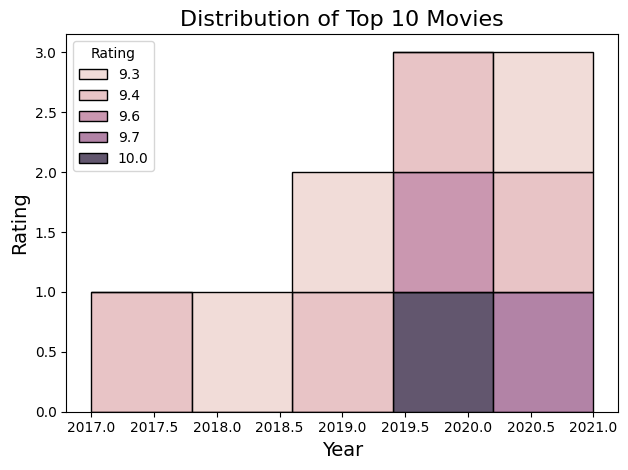

In [ ]:
sns.histplot(data=top_movie, x="Year", hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

top_n_genres = genre_counts.head(5)
print(top_n_genres)


            Genre  Count
0           Drama   2780
1          Action   1289
2        Thriller    779
3         Romance    708
4  Drama, Romance    524


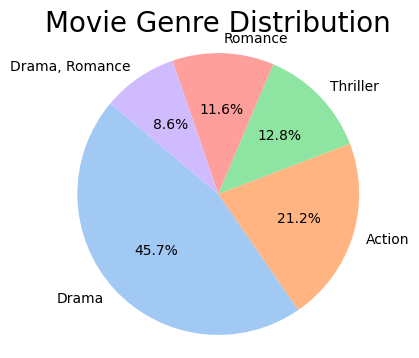

In [ ]:
plt.figure(figsize=(4, 4))
colors = sns.color_palette('pastel')  # Seaborn color palette
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Movie Genre Distribution', fontsize=20)
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

In [ ]:
# Assuming `movie_data` is a Pandas DataFrame with columns 'Director' and 'Rating'
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()

# Sorting by 'Rating' in descending order
director_avg_rating = director_avg_rating.sort_values(by="Rating", ascending=False)

# Selecting the top 10 directors
top_directors = director_avg_rating.head(10)

# Displaying the result
print(top_directors)

             Director  Rating
4495  Saif Ali Sayeed    10.0
5154      Sriram Raja     9.7
1017      Bobby Kumar     9.6
647     Arvind Pratap     9.4
675      Ashish Dubey     9.4
5232   Suhrud Godbole     9.4
3046     Munni Pankaj     9.4
5650     Venkatesh Bk     9.3
5819     Vishwa Bhanu     9.3
3767   Raghav Jairath     9.3


<ipython-input-10-4a4d56372bc6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')


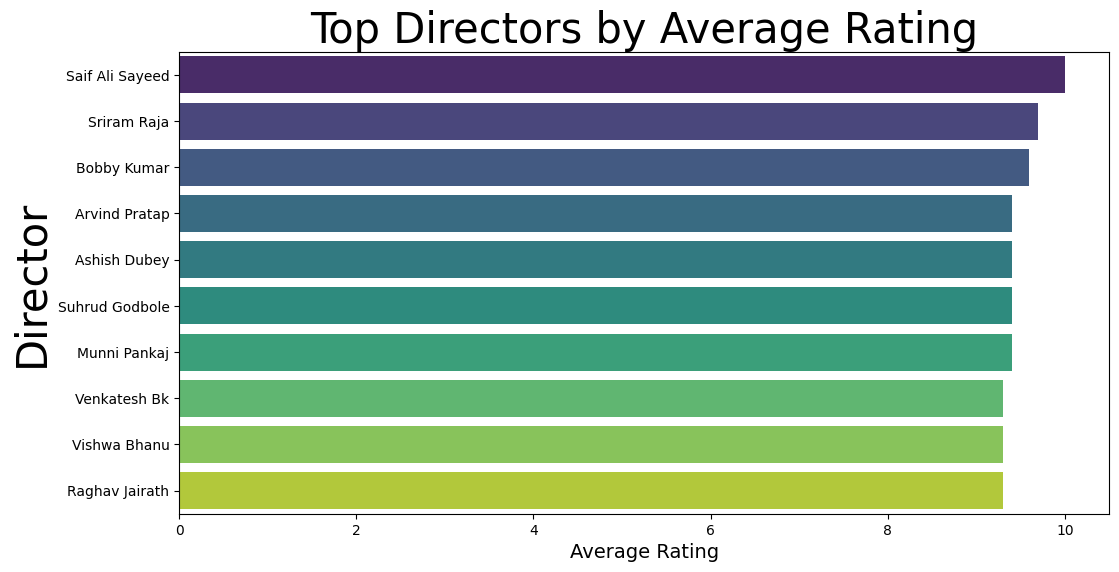

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')
plt.title('Top Directors by Average Rating', fontsize=30)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel("Director", fontsize=30)
plt.show()

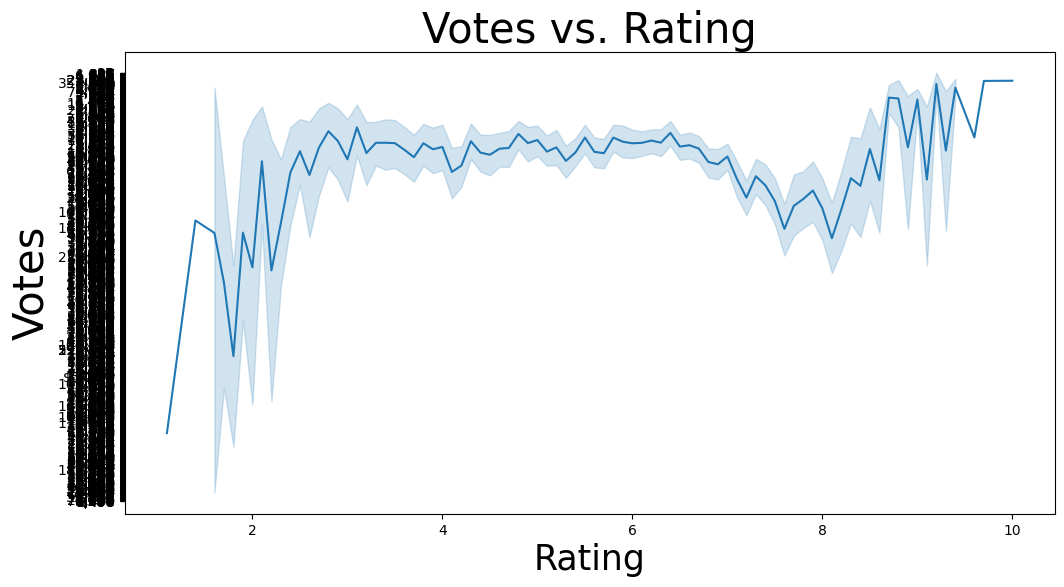

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=movie_data, x='Rating', y='Votes')
plt.title('Votes vs. Rating', fontsize=30)
plt.xlabel('Rating', fontsize=25)
plt.ylabel('Votes', fontsize=30)
plt.show()

In [ ]:
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']
top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Ashok Kumar,158
1,Dharmendra,140
2,Jeetendra,140
3,Mithun Chakraborty,133
4,Amitabh Bachchan,129
5,Rajesh Khanna,122
6,Dev Anand,93
7,Shashi Kapoor,91
8,Akshay Kumar,88
9,Sanjeev Kumar,83


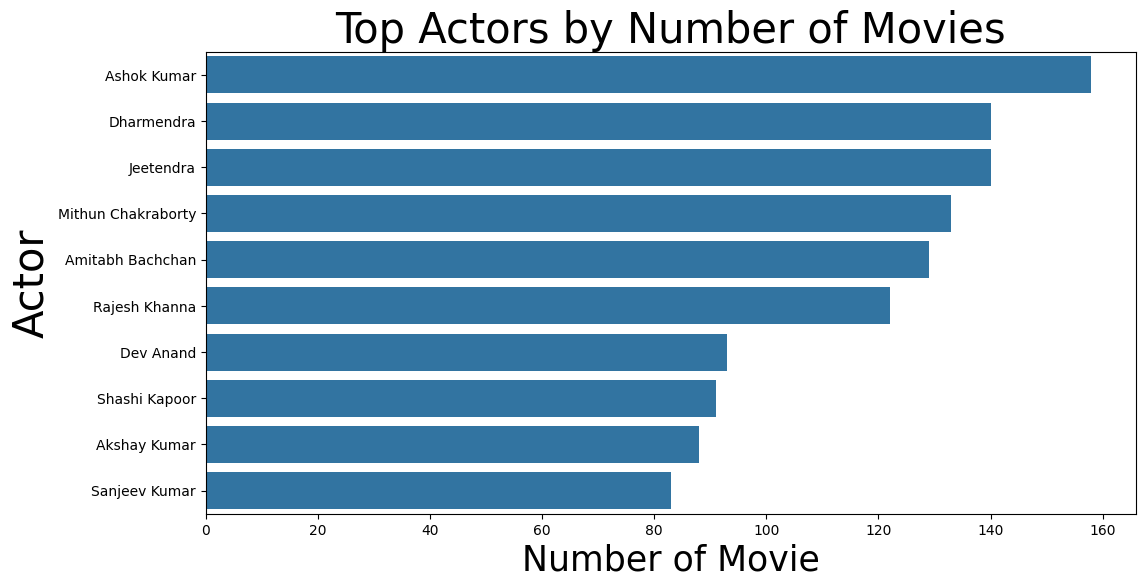

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')
plt.title('Top Actors by Number of Movies', fontsize=30)
plt.xlabel('Number of Movie', fontsize=25)
plt.ylabel('Actor', fontsize=30)
plt.show()

In [ ]:
yearly_movie_counts = movie_data[ 'Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']
yearly_movie_counts = yearly_movie_counts.sort_values (by='Year')
yearly_movie_counts

,Year,MovieCount
98,(1913),1
100,(1914),1
95,(1915),1
97,(1917),1
96,(1922),1
...,...,...
2,(2018),381
0,(2019),410
5,(2020),320
1,(2021),392


In [ ]:
movie_data['Genre'] = movie_data['Genre'].str.split(",")
genre_df = movie_data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Homecoming,(2021),90 min,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
...,...,...,...,...,...,...,...,...,...,...
15505,Zulmi,(1999),129 min,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)

<ipython-input-20-2817d40ec182>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre', palette='coolwarm')


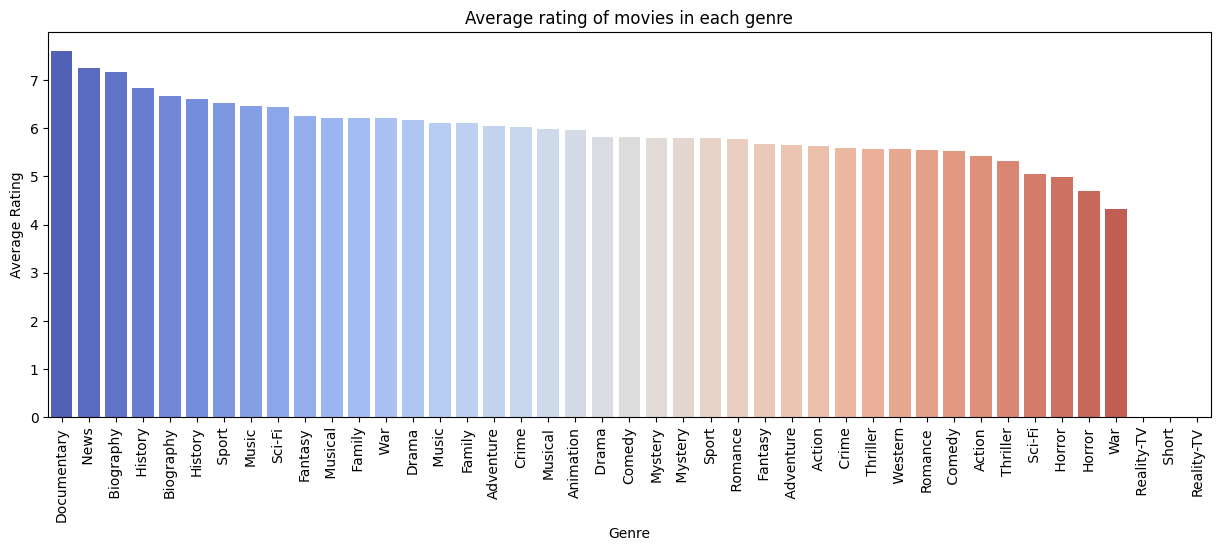

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre', palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)
plt.show()

# MODEL BUILDING AND EXECUTION

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
trans_data = movie_data.drop(['Name'],axis=1)
trans_data['Director'] = labelencoder.fit_transform(movie_data['Director'])
trans_data['Actor 1'] = labelencoder.fit_transform(movie_data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(movie_data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(movie_data['Actor 3'])
trans_data['Genre'] = labelencoder.fit_transform(movie_data['Genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x)))
trans_data.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,299,NaN,NaN,1926,2250,800,3108
1,(2019),109 min,299,7.0,8,1548,3280,4790,527
2,(2021),90 min,351,NaN,NaN,5123,3713,2866,3450
3,(2019),110 min,228,4.4,35,3319,2917,1504,4020
4,(2010),105 min,299,NaN,NaN,385,3112,3462,405


In [ ]:
# Convert 'Votes' to numeric, removing commas and handling errors
trans_data['Votes'] = pd.to_numeric(trans_data['Votes'].str.replace(',', ''), errors='coerce')

# Convert 'Year' and 'Duration' columns to numeric, handling errors
trans_data['Year'] = pd.to_numeric(trans_data['Year'], errors='coerce')
trans_data['Duration'] = pd.to_numeric(trans_data['Duration'], errors='coerce')

# Fill NaN values (created by errors during conversion) with 0
trans_data.fillna(0, inplace=True)

# Now apply scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)
sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.0,0.0,0.616495,0.00,0.000000,0.324352,0.476897,0.163566,0.644813
1,0.0,0.0,0.616495,0.70,0.000014,0.260694,0.695210,0.979350,0.109336
2,0.0,0.0,0.723711,0.00,0.000000,0.862748,0.786986,0.585974,0.715768
3,0.0,0.0,0.470103,0.44,0.000059,0.558942,0.618270,0.307504,0.834025
4,0.0,0.0,0.616495,0.00,0.000000,0.064837,0.659602,0.707831,0.084025


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)
sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.0,0.0,0.616495,0.00,0.000000,0.324352,0.476897,0.163566,0.644813
1,0.0,0.0,0.616495,0.70,0.000014,0.260694,0.695210,0.979350,0.109336
2,0.0,0.0,0.723711,0.00,0.000000,0.862748,0.786986,0.585974,0.715768
3,0.0,0.0,0.470103,0.44,0.000059,0.558942,0.618270,0.307504,0.834025
4,0.0,0.0,0.616495,0.00,0.000000,0.064837,0.659602,0.707831,0.084025


In [ ]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

,Rating
Rating,1.000000
Votes,0.150269
Director,-0.018368
Actor 1,-0.122354
Actor 2,-0.164484
Actor 3,-0.247790
Genre,-0.259567
Year,NaN
Duration,NaN


<Axes: >

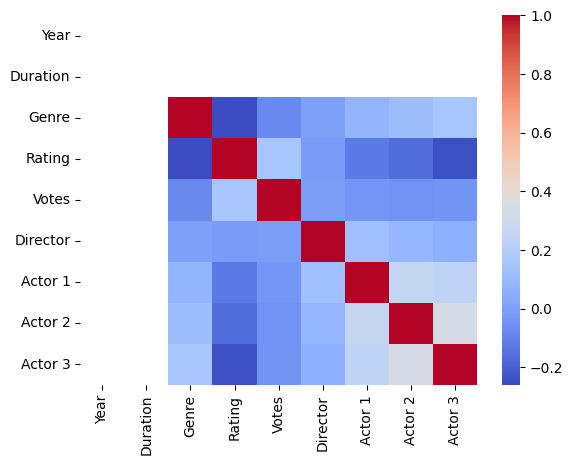

In [ ]:
sns.heatmap(corr_df,annot=False,cmap="coolwarm")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
X = trans_data.drop(['Rating'],axis=1)

In [ ]:
y = trans_data['Rating']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test = np.array(X_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.57238937, 2.14328018, 0.94845674, ..., 1.07249607, 3.20612442,
       3.54882389])

In [ ]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ' ,mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.1433070923698122
Mean squared error:  8.068463999850687
Mean absolute error:  2.5353476559231383


In [ ]:
print(y_test)

11115    0.0
2921     6.8
3463     0.0
2495     0.0
15263    0.0
        ... 
11391    5.5
14647    0.0
7238     0.0
8747     0.0
12012    5.8
Name: Rating, Length: 4653, dtype: float64


Hence succesfully created a movie rating prediction system using python.